Sama halnya dengan Word2Vec, FastText juga mengubah word menjadi vector.
<br>Namun, word yang dipilih oleh FastText adalah subword.

Karena memakai subword, otomatis hampir semua kata ada vocabnya, bahkan yang typo.

# 1. Import Library

In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize

from tqdm.auto import tqdm
from gensim.models import FastText

# 2. Extract Data

In [3]:
df = pd.read_csv('/content/ojol_review.csv')
df.sample(5)

,review,rate
39,Kenapa ya saya top up diamon mobile legend ngg...,1
964,Hari ini di terminal 3 ultimate saya pesan Goc...,3
1275,Titik motor selalu ketinggalan dibaca server k...,1
739,"Pas login / masuk ke aplikasi, kode sms tidak ...",1
197,Hari ini order makanan dengan 1 driver knp pas...,1


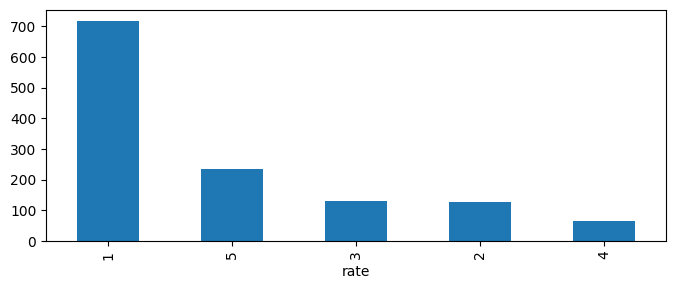

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
df['rate'].value_counts().plot(kind='bar');

# 3. Prepare

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
sentences = [word_tokenize(kalimat.lower()) for kalimat in tqdm(df['review'])]

  0%|          | 0/1277 [00:00<?, ?it/s]

# 4. Word Embedding

In [10]:
w2v_model = FastText(sentences,vector_size=200,window=5,epochs=100)

# 5. Check Model

In [11]:
w2v = w2v_model.wv

In [ ]:
## check vocab
# w2v.index_to_key

In [12]:
## check vector
w2v.vectors.shape

(1121, 200)

In [14]:
## check vector dari suatu kata (bahkan typo)
w2v["gjk"]

array([ 1.12570776e-03, -2.38998584e-03,  8.67522496e-04, -4.52508364e-04,
       -3.79042904e-04,  1.40888224e-04, -4.97047382e-04,  1.07806605e-04,
       -2.17761635e-03,  1.69599848e-03, -1.34754647e-03,  6.25236135e-05,
       -7.91233557e-04,  4.56353562e-04, -3.70425805e-05, -9.51875467e-04,
        9.12170683e-04, -5.44996758e-04, -1.31753460e-03, -1.56515685e-03,
        6.61926751e-04,  3.18955252e-04, -4.04128426e-04, -4.67003236e-04,
        1.65905178e-04,  3.28625720e-05,  1.01435569e-03,  9.79702570e-04,
        1.97409443e-03,  5.65820141e-04, -1.19982648e-03,  1.61256862e-03,
        3.19366605e-04,  7.80336035e-04,  4.66212718e-04,  2.73536891e-04,
        4.44089907e-04, -8.51797697e-04, -3.57694080e-04, -5.94107376e-04,
       -7.59678660e-04, -1.09657214e-03,  8.50337557e-04, -6.44568412e-04,
       -4.51204454e-04,  1.54077960e-03, -2.31322460e-03, -6.02373446e-04,
        1.34231651e-03,  1.01208256e-03,  6.55957672e-04, -1.40686985e-03,
        1.46576820e-03, -

# 6. Visualisasi Dimensi Tinggi

In [15]:
!pip install umap-learn
from umap import UMAP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.4 MB/s eta 0:00:00


In [16]:
X = UMAP().fit_transform(w2v.vectors)

In [17]:
df = pd.DataFrame(X, columns=["umap1","umap2"])
df['teks'] = w2v.index_to_key
df.head()

,umap1,umap2,teks
0,12.325297,12.591590,","
1,12.704512,13.367988,.
2,9.968560,10.693604,saya
3,12.916390,13.535565,!
4,11.431176,11.166315,di


In [18]:
import plotly.express as px
fig = px.scatter(df,x="umap1",y="umap2",text="teks")
fig.update_traces(textposition = 'top center')
fig.update_layout(height=800,title_text="Word2Vec Visualization in 2 Dimension by UMAP")
fig.show()

# 7. Check Similar Word

In [20]:
w2v.similar_by_word("gojk",topn=5)

[('gojeg', 0.8588690757751465),
 ('go', 0.723746120929718),
 ('gojek', 0.6670474410057068),
 ('goshop', 0.6654350161552429),
 ('good', 0.6464950442314148)]